# Python Boot Camp

***

## Table of contents:

* [Images as arrays](#first)   
* [Image color space](#second)
* [Image data types](#third)
* [Plotting images](#fourth)
* [Images in Deep Learning frameworks](#fifth)
* [Simple image manipulation](#sixth)
* [Loading a set of images](#seventh)
* [Segmentation maps](#eighth)
* [Batching](#ninth)
* [Data augmentation](#tenth)
* [Using Tensorboard](#eleventh)
* [Convolutions](#twelveth)


*** 

In this notebook, we will go through some basic image processing in Python and familiarize ourselves with different utilities that can be useful for any Deep Learning pipeline, utilities provides through libraries like `skimage`, `imgaug`, `tensorboard`, `glob`, `tqdm` and more.

We will be using sample images from this [three-dimensional X-ray microtomography thalamocortical dataset](https://github.com/nerdslab/xray-thc), used to characterize brain heterogeneity. These samples, imaged in the Striatum and Hypothalamus regions of a mouse brain, were annotated to get microstructure segmentation maps (of cell bodies, blood vessels, and myelinated axons). The full dataset is available on [bossdb](https://bossdb.org/project/prasad2020)! 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Images as arrays <a class="anchor" id="first"></a>

Images are represented as numpy arrays of shape (height, width, channels).

![RGB image as a numpy array](./assets/image_as_array.png)

<div style="text-align: right"> Credit: <a href="https://e2eml.school/convert_rgb_to_grayscale.html">Brandon Rohrer’s Blog</a></div>


Multiple utilities exist to read images from files in Python,
we will use `skimage.io.imread`.

In [2]:
from skimage import io

img = io.imread('data/img_650_1162__600_1112__0.tiff')
print('Type:', type(img))

Type: <class 'numpy.ndarray'>


## Image color space <a class="anchor" id="second"></a>
If the image is in grayscale, then the number of channels is equal to 1,
in which case the array can also be of shape (height, width).
If the image is RGB, then the number of channels is 3
with each channel encoding the red, green and blue components.

**Q: Is `img` RGB or Grayscale?**

<div style="text-align: right"> Help: <a href="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf">Numpy cheatsheet</a></div>

In [3]:
# Solution
print(img.shape)

(512, 512)


**Q: Reshape the image such that its shape is (height, width, 1)**

<div style="text-align: right"> Hint: <a href="https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html">expand dims</a></div>

In [4]:
# img = ...

In [5]:
# Solution
img = np.expand_dims(img, axis=2)
# or img = img[:, :, np.newaxis]

## Image data types <a class="anchor" id="third"></a>


Images can be represented by a variety of data types. The following is a list of the most common types:
- `bool`: binary, 0 or 1
- `uint8`: unsigned integers, 0 to 255 range
- `float`: -1 to 1 or 0 to 1

**Q: What is the data type of `img`? What are the minimum and maximum intensity values?**
<div style="text-align: right"> Help: <a href="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf">Numpy cheatsheet</a></div>

In [6]:
# Solution
print(img.dtype)
print(img.min(), img.max())

uint8
0 255


## Plotting images <a class="anchor" id="fourth"></a>

Using `matplotlib` we can visualize the image. When the image is in grayscale,
a colormap can be specified using the `cmap` argument. By default,
the colormap is `viridis`, we will use `gray`.

> Useful `matplotlib` ressources:
> - [matplotlib cheatsheets](https://github.com/matplotlib/cheatsheets)
> - [colormaps in matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

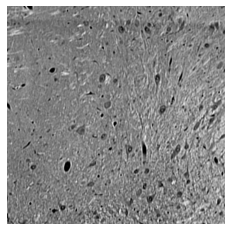

In [7]:
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Images in Deep Learning frameworks <a class="anchor" id="fifth"></a>


In pytorch, tensorflow or jax, images are represented as (channels, height, width)
and are rescaled to be in the [0, 1] range.

**Q: Generate a new image that respects these conventions.
You can use [`np.transpose`](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html).**

In [8]:
img_tensor = ...

In [9]:
# Solution
img_tensor = np.transpose(img, (2, 0, 1))
print(img_tensor.shape)

img_tensor = img_tensor / 255.
print(img_tensor.dtype)
print(img_tensor.min(), img_tensor.max())

(1, 512, 512)
float64
0.0 1.0


## Simple image manipulation <a class="anchor" id="sixth"></a>

Given that images are numpy arrays, we can take advantage of the powerful
 [indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html)
 to perform simple transformations like cropping, downsampling and flipping.

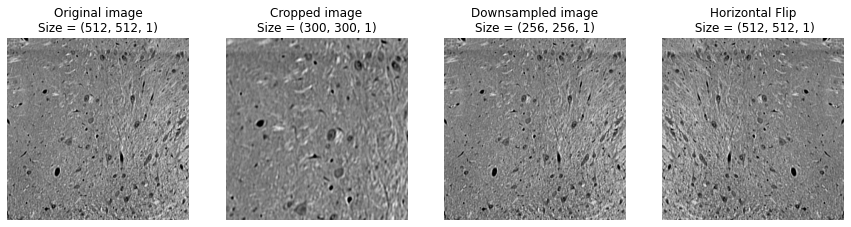

In [10]:
# cropping
cropped_img = img[10:310, 50:350]

# downsampling
factor = 2
downsampled_img = img[::factor, ::factor]

# horizontal flip
hflip_img = img[:,::-1]

fig, axs = plt.subplots(1, 4, figsize=(15,5), frameon=False)

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original image\nSize = {}'.format(str(img.shape)))
axs[0].axis('off')

axs[1].imshow(cropped_img, cmap='gray')
axs[1].set_title('Cropped image\nSize = {}'.format(str(cropped_img.shape)))
axs[1].axis('off')

axs[2].imshow(downsampled_img, cmap='gray')
axs[2].set_title('Downsampled image\nSize = {}'.format(str(downsampled_img.shape)))
axs[2].axis('off')

axs[3].imshow(hflip_img, cmap='gray')
axs[3].set_title('Horizontal Flip\n Size = {}'.format(str(hflip_img.shape)))
axs[3].axis('off')
plt.show()

**Q: Apply the following transformations:**
- Center crop of size (256, 256)
- Vertical flip

In [11]:
# 

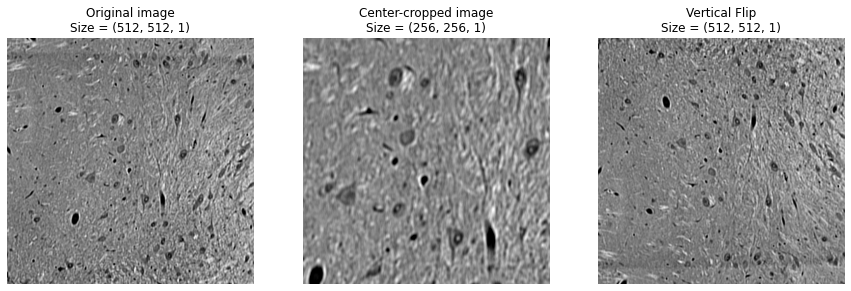

In [12]:
# Solution
# center crop
height, width, _ = img.shape
top, bottom = height // 4, 3 * height // 4
left, right =  width // 4, 3 * width // 4

cropped_img = img[top:bottom, left:right]

# vertical flip
vflip_img = img[::-1]

fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original image\nSize = {}'.format(str(img.shape)))
axs[0].axis('off')

axs[1].imshow(cropped_img, cmap='gray')
axs[1].set_title('Center-cropped image\nSize = {}'.format(str(cropped_img.shape)))
axs[1].axis('off')

axs[2].imshow(vflip_img, cmap='gray')
axs[2].set_title('Vertical Flip\nSize = {}'.format(str(vflip_img.shape)))
axs[2].axis('off')

plt.show()

## Loading a set of images <a class="anchor" id="seventh"></a>

Given a set of images in a folder, we need to be able to easily find the pathnames and load them in. 
`glob` is a standard package that provides a utility for finding all pathnames that match a given pattern.

Here our images have the `.tiff` extenstion and all start with `img`

In [13]:
import os
from glob import glob

root = 'data/'
img_filenames = glob(os.path.join(root, 'img*.tiff'))

print('Found:')
for img_filename in img_filenames:
    print(' ', img_filename)

Found:
  data/img_3550_4062__320_832__49.tiff
  data/img_650_1162__600_1112__0.tiff
  data/img_650_1162__600_1112__49.tiff
  data/img_3550_4062__320_832__0.tiff


We can now load the images.

We will use `tqdm` to track progress (even though we only have a small number of images here). `tqdm` provides a progress bar that simply wraps around any iterable, making it useful for tracking training progress for example.

100%|██████████| 4/4 [00:00<00:00, 517.86it/s]


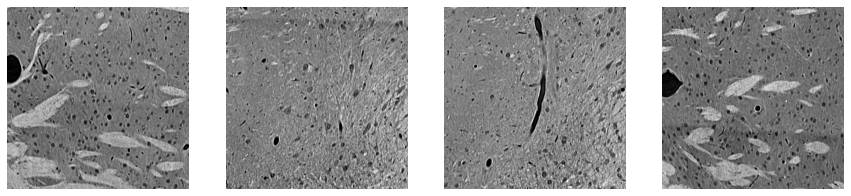

In [14]:
from tqdm import tqdm

imgs = []
for fname in tqdm(img_filenames):
    img = io.imread(fname)
    img = np.expand_dims(img, axis=2)
    imgs.append(img)

fig, axs = plt.subplots(1, 4, figsize=(15,5))
for i in range(4):
    axs[i].imshow(imgs[i], cmap='gray')
    axs[i].axis('off')

## Segmentation maps <a class="anchor" id="eighth"></a>

In addition to the image files, you will also find the corresponding segmentation files. 

**Q: Using what we have seen thus far, load the segmentation maps into a list called `seg_maps` and visualize them. Be careful with the file ordering.**
<div style="text-align: right"> <a href="https://pythonbasics.org/replace/">Hint</a></div>

In [15]:
seg_maps = ...

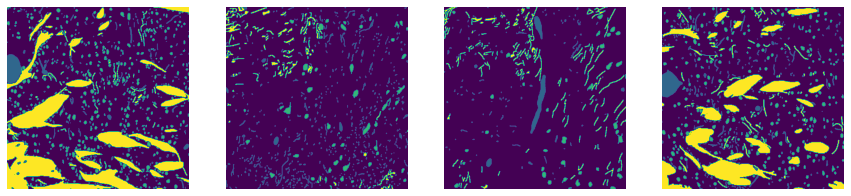

In [16]:
# Solution
annos_filenames = [filename.replace('img', 'annos') for filename in img_filenames]

seg_maps = []
for fname in annos_filenames:
    seg_map = io.imread(fname)
    seg_maps.append(seg_map)

fig, axs = plt.subplots(1, 4, figsize=(15,5))
for i in range(4):
    axs[i].imshow(seg_maps[i])
    axs[i].axis('off')

plt.show()

You will notice that there are 4 unique values in the segmentation maps, each corresponding to one of these four classes:
- 0: background
- 1: cell
- 2: blood vessel
- 3: axon


## Batching <a class="anchor" id="ninth"></a>

Mini-batch stochastic gradient descent is commonly used during the training of networks.
A batch of $B$ images is fed to the model. The input shape will thus get an additional batch dimension at the first dimension: (batch_size, channels, height, width).

**Q: Make a batch out of the four images**

In [17]:
batch = ...

In [18]:
# Solution
img_tensors = [img.transpose((2, 0, 1)) for img in imgs]
batch = np.stack(img_tensors)

print(batch.shape)

(4, 1, 512, 512)


## Data augmentation <a class="anchor" id="tenth"></a>

Data augmentation (DA) is an important component of Deep Learning.
By generating a larger set of training examples, DA helps with generalization.

`imgaug` is a Python library that provides a very extensive set of image augmentations,
and that seamlessly handles complex annotations like segmentation maps, bounding boxes or keypoints.

In [19]:
import imgaug as ia
from imgaug import augmenters as iaa

# fix the random seed
ia.seed(4)

#### Augmenting an image
To use an augmentation, we can instantiate an `Augmenter` with a set of hyperparamters.
With affine transforamtions for example, we can specify the range of the rotation angle to be `(-45, 45)`.

In `imgaug`, the channel-axis is always expected to be the last axis and may be skipped for grayscale images, it is
also recommended to work with the `uint8` dtype.

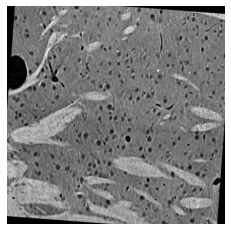

In [20]:
rotate = iaa.Affine(rotate=(-45, 45))
img_aug = rotate(image=imgs[0])

plt.imshow(img_aug, cmap='gray')
plt.axis('off')
plt.show()

Note: Try running the previous cell again.

#### Augmenting image AND segmentation map

When applying certain augmentations, we want to make sure that the segmentation map is changed accordingly.

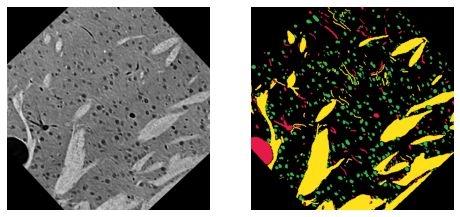

In [21]:
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

# convert array to SegmentationMapsOnImage instance
seg_map = SegmentationMapsOnImage(seg_maps[0], shape=imgs[0].shape)
# augment
img_aug, seg_map_aug = rotate(image=imgs[0], segmentation_maps=seg_map)

fig, axs = plt.subplots(1, 2, figsize=(8,5))
axs[0].imshow(img_aug, cmap='gray')
axs[0].axis('off')

axs[1].imshow(seg_map_aug.draw()[0], cmap='gray')
axs[1].axis('off')
plt.show()

#### Applying multiple augmentations
We can compose multiple augmentations

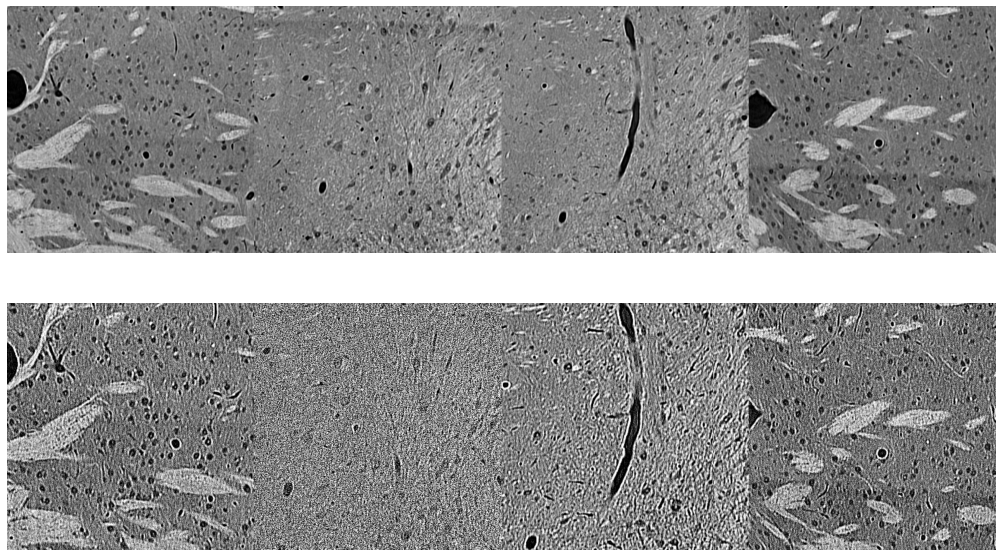

In [22]:
seq = iaa.Sequential([
    iaa.AdditiveGaussianNoise(scale=(0, 30)),
    iaa.pillike.FilterEdgeEnhanceMore(),
    iaa.Crop(percent=(0., 0.2))
])

imgs_aug = seq(images=imgs)

fig, axs = plt.subplots(2, 1, figsize=(20,10))
axs[0].imshow(np.concatenate((imgs), axis=1), cmap='gray')
axs[0].axis('off')

axs[1].imshow(np.concatenate((imgs_aug), axis=1), cmap='gray')
axs[1].axis('off')
plt.show()

**Q: Famalirize yourself with the different augmentations available through `imgaug`. Refer to the [examples](https://github.com/aleju/imgaug) and the [documentation](https://imgaug.readthedocs.io/en/latest/). Identify and apply augmentations that you think are interesting.**

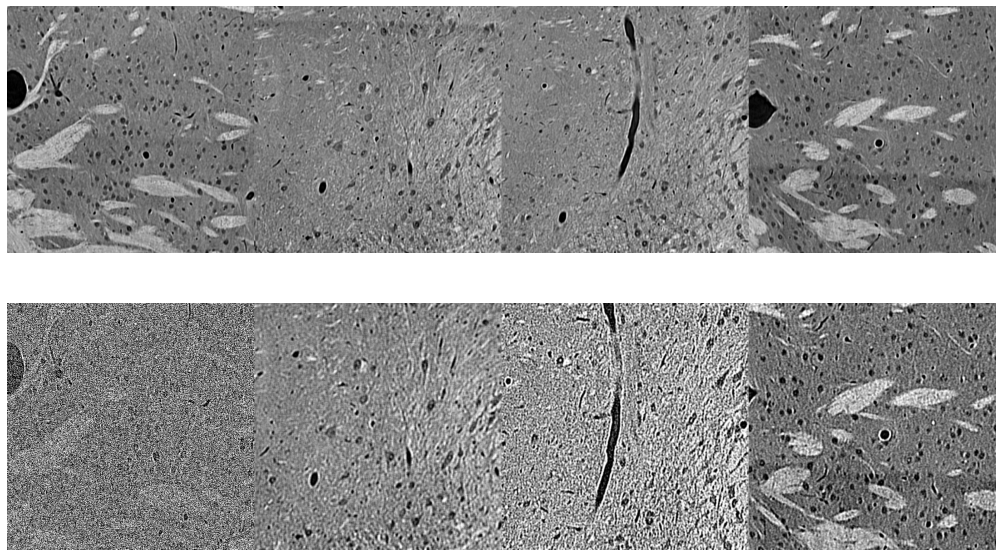

In [23]:
# Solution
seq = iaa.Sequential([
    iaa.AdditiveGaussianNoise(scale=(0, 30)),
    iaa.GaussianBlur(sigma=(0.0, 3.0)),
    iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0)),
    iaa.pillike.FilterEdgeEnhanceMore(),
    iaa.Crop(percent=(0., 0.2))
])

imgs_aug = seq(images=imgs)

fig, axs = plt.subplots(2, 1, figsize=(20,10))
axs[0].imshow(np.concatenate((imgs), axis=1), cmap='gray')
axs[0].axis('off')


axs[1].imshow(np.concatenate((imgs_aug), axis=1), cmap='gray')
axs[1].axis('off')
plt.show()

## Using Tensorboard <a class="anchor" id="eleventh"></a>

TensorBoard is a powerful visualization toolkit for machine learning experimentation. TensorBoard allows tracking metrics such as loss and accuracy, displaying images during training and much more.

- Using Tensorboard in PyTorch: https://pytorch.org/docs/stable/tensorboard.html
- Using Tensorboard in TensorFlow/keras: https://www.tensorflow.org/tensorboard/get_started

In [24]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [25]:
writer.add_image('image', imgs[0], global_step=0, dataformats='HWC')
writer.add_image('ground_truth_segmentation', seg_maps[0], global_step=0, dataformats='HW')

Now, start TensorBoard:

```bash
tensorboard --logdir=runs
```
and go to the URL it provides.

## Convolutions <a class="anchor" id="twelveth"></a>

Convolutions are the elementary operations used in CNNs. The image (and later, the feature maps) are convolved with multiple kernels which weights are learned. Below is a visual of the pixel values in the output matrix (green) being computed from neighboring pixels in the input matrix (blue). 

![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif)

<div style="text-align: right"> Credit: <a href="https://github.com/vdumoulin/conv_arithmetic">Vincent Dumoulin, Francesco Visin</a></div>

**Q: Implement a function that performs "convolution". Assume that your image is square and that your kernel is square and has an odd width. Note that your output image will be smaller.**

In [26]:
def conv2d(img, kernel):
    m = img.shape[0]  #size of original image
    k = kernel.shape[0]  #size of filter
    
    mc = ... #size of the new image after convolution
    conv_img = np.zeros((mc,mc))
    
    # perform convolution
    for ii in range(mc):
        for jj in range(mc):
            ...
    
    return conv_img

In [27]:
# Solution
def conv2d(img, kernel):
    m = img.shape[0]  #size of original image
    k = kernel.shape[0]  #size of filter
    
    mc = m - k + 1 #size of the new image after convolution
    conv_img = np.zeros((mc,mc))
    
    for ii in range(mc):
        for jj in range(mc):
            conv_img[ii,jj] = np.sum(img[ii:ii+k, jj:jj+k] * kernel)
    return conv_img

### Smoothing filter
Convolving the image with a smoothing filter is equivalent to replacing the value of each pixel with the average pixel value within a window of size $dxd$ around it.

**Q: Design a smoothing filter. Try different values of d.**

In [28]:
kernel = ...

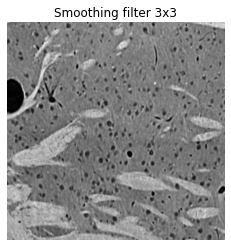

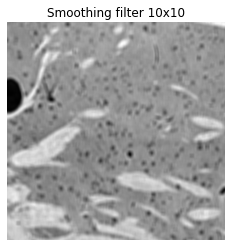

In [29]:
# Solution
kernel_3 = np.ones((3, 3)) / 9
conv_img_3 = conv2d(imgs[0], kernel_3)

kernel_10 = np.ones((10, 10)) / 100
conv_img_10 = conv2d(imgs[0], kernel_10)

plt.imshow(conv_img_3, cmap='gray')
plt.axis('off')
plt.title('Smoothing filter 3x3')
plt.show()

plt.imshow(conv_img_10, cmap='gray')
plt.axis('off')
plt.title('Smoothing filter 10x10')
plt.show()

**Q: What is the effect of this filter?**

In [30]:
# Solution
#  It removes the high-frequency content from the image. 
#  It is also used to blur an image.

### Sobel filter
The following is known as the Sobel filter:

$$
\begin{bmatrix}
    1 & 2 & 1 \\
    0 & 0 & 0 \\
    -1 & -2 & -1 
\end{bmatrix}
$$

**Q: Apply the Sobel filter and describe what it does**

In [31]:
kernel = ...

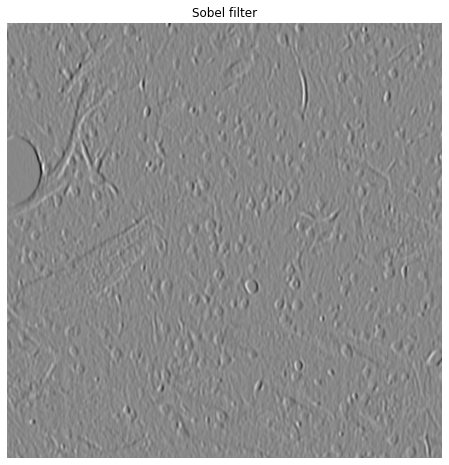

In [32]:
# Solution
kernel = np.array([[ 1,  2,  1], 
                   [ 0,  0,  0], 
                   [-1, -2, -1]])
conv_img = conv2d(imgs[0], kernel)

plt.figure(figsize=(8, 8))
plt.imshow(conv_img, cmap='gray')
plt.axis('off')
plt.title('Sobel filter')
plt.show()

In [33]:
# Solution
# Used for edge detection as it creates an image emphasising edges present in the original image.
# The operator calculates approximations of the derivatives for vertical changes in this case.